In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [84]:
def display_img(img, cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()

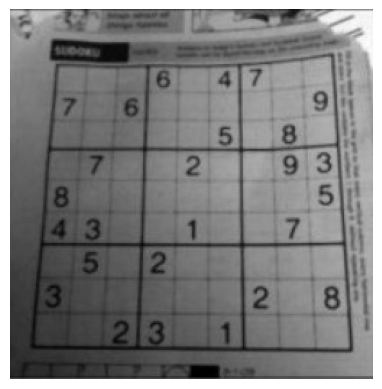

In [242]:
original_img = cv2.imread("../Data set/sodoku.jpg", cv2.IMREAD_UNCHANGED)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
display_img(original_img)

# First step is to identify the box containing the image
for this task the strategy is to use a high threshold even it causes the numbers to be eroded 

In [243]:
# Canny hyperparameters
canny_threshold1 = 100
canny_threshold2 = 250
aperture_size = 3

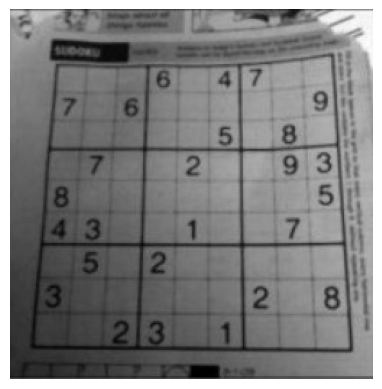

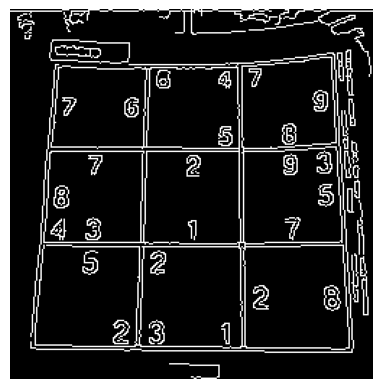

In [244]:
canny_image = cv2.Canny(original_img, canny_threshold1, canny_threshold2, apertureSize=aperture_size)
display_img(original_img)
display_img(canny_image)

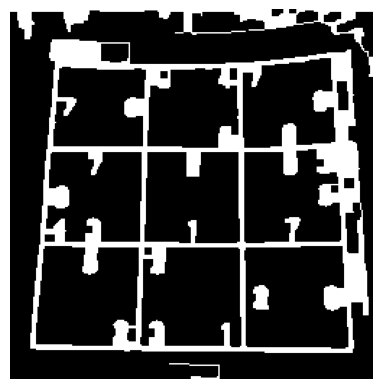

In [245]:
closing_kernel = np.matrix("1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1", np.uint8)
canny_closed = cv2.morphologyEx(canny_image, cv2.MORPH_CLOSE, closing_kernel, 1)
display_img(canny_closed)

In [246]:
# Hough hyperparameters
hough_threshold = 175

In [247]:
lines = cv2.HoughLines(canny_closed, 1, np.pi/180, hough_threshold)

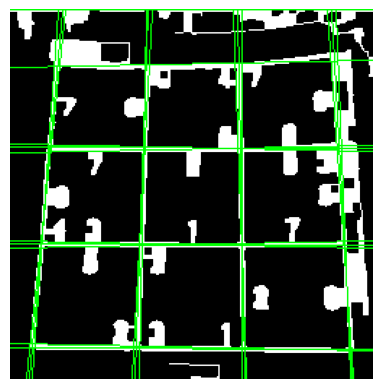

In [248]:
canny_copy = cv2.cvtColor(canny_closed.copy(), cv2.COLOR_GRAY2BGR)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    
    a = np.cos(theta)
    b = np.sin(theta)

    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(canny_copy, (x1, y1), (x2, y2), (0, 255, 0), 1)

display_img(canny_copy)

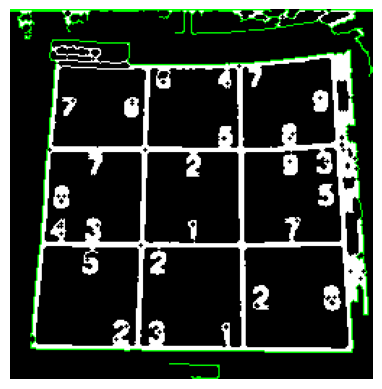

In [202]:
canny_copy = canny_closed.copy()
contours, hierarchy = cv2.findContours(canny_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
canny_copy = cv2.cvtColor(canny_copy, cv2.COLOR_GRAY2BGR)
cv2.drawContours(canny_copy, contours, -1, (0, 255, 0), 1)
display_img(canny_copy, None)

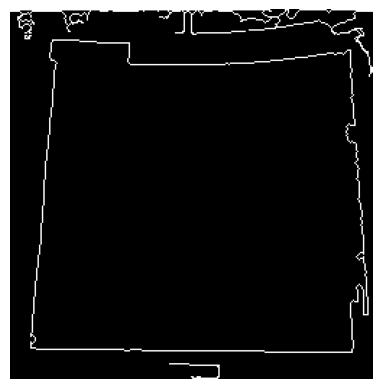

In [203]:
contours_image = np.zeros_like(original_img)
cv2.drawContours(contours_image, contours, -1, (255, 0, 0), 1)
display_img(contours_image)